In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv("C:/Users/97455/Downloads/data_science capston/Project 2/Project 2/Healthcare - Diabetes/health care diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
#Project Task: Week 1

#1.Data Exploration:

#Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

#Glucose

#BloodPressure

#SkinThickness

#Insulin

#BMI

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#There are no null values

In [ ]:
#2,Visually explore these variables using histograms. Treat the missing values accordingly.

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

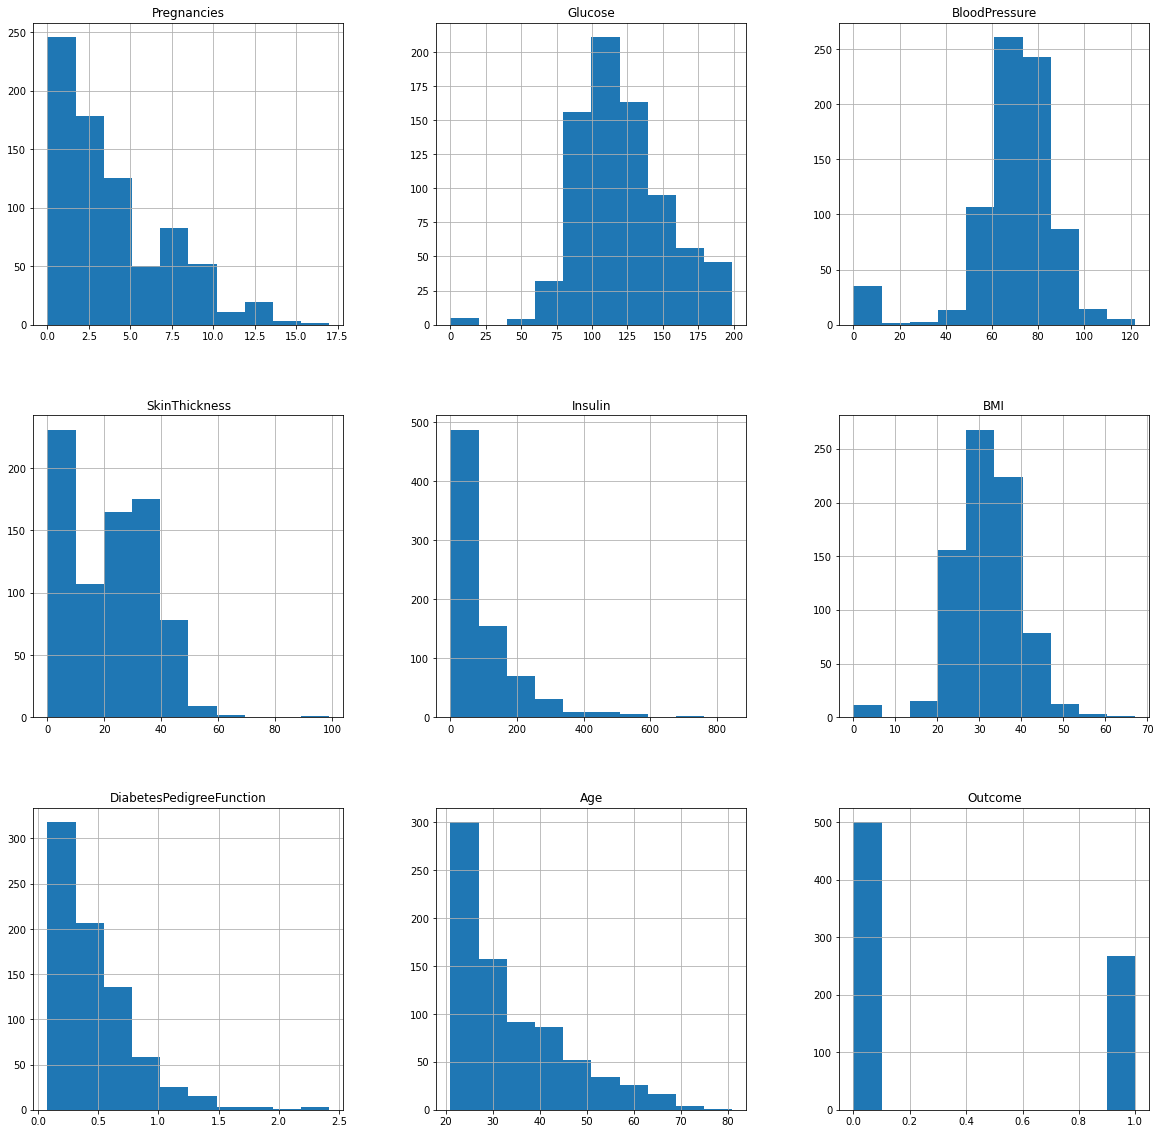

In [12]:
data.hist(figsize=(20,20),xlabelsize=10)

In [ ]:
#3.There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.

In [10]:
data.dtypes.value_counts()

int64      7
float64    2
dtype: int64

<AxesSubplot:>

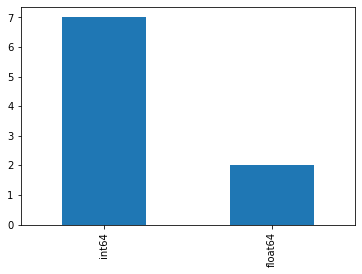

In [14]:
data.dtypes.value_counts().plot(kind='bar')

In [ ]:
#Data Exploration:

#4.Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

In [15]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:>

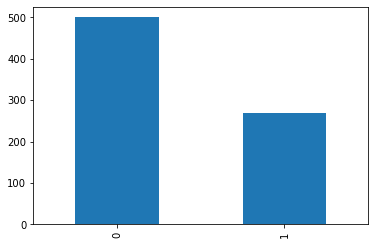

In [16]:
data['Outcome'].value_counts().plot(kind='bar')

In [ ]:
#Since classes in Outcome is  skewed so we will generate new samples using SMOTE (Synthetic Minority Oversampling Technique) for the class '1' which is under-represented in our data. We will use SMOTE out of many other techniques available since:



In [17]:
data_x=data.drop('Outcome',axis=1)
data_y=data['Outcome']

In [18]:
data_x.shape

(768, 8)

In [19]:
data_y.shape

(768,)

In [23]:
from imblearn.over_sampling import SMOTE

In [25]:
data_x_resampled, data_y_resampled = SMOTE(random_state=100).fit_resample(data_x, data_y)
print(data_x_resampled.shape, data_y_resampled.shape)

(1000, 8) (1000,)


In [27]:
data_y_resampled.value_counts()

0    500
1    500
Name: Outcome, dtype: int64

<AxesSubplot:>

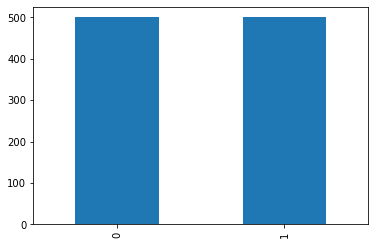

In [26]:

data_y_resampled.value_counts().plot(kind='bar')


In [28]:
#5.Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

In [29]:
new_data=pd.concat([data_x_resampled,data_y_resampled],axis=1)

In [30]:
new_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


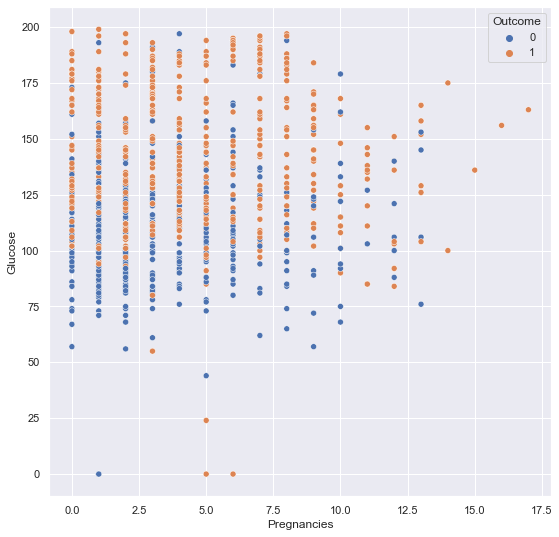

In [41]:
sns.set(rc={'figure.figsize':(9,9)})
sns.scatterplot(x="Pregnancies", y="Glucose", data=new_data, hue="Outcome");

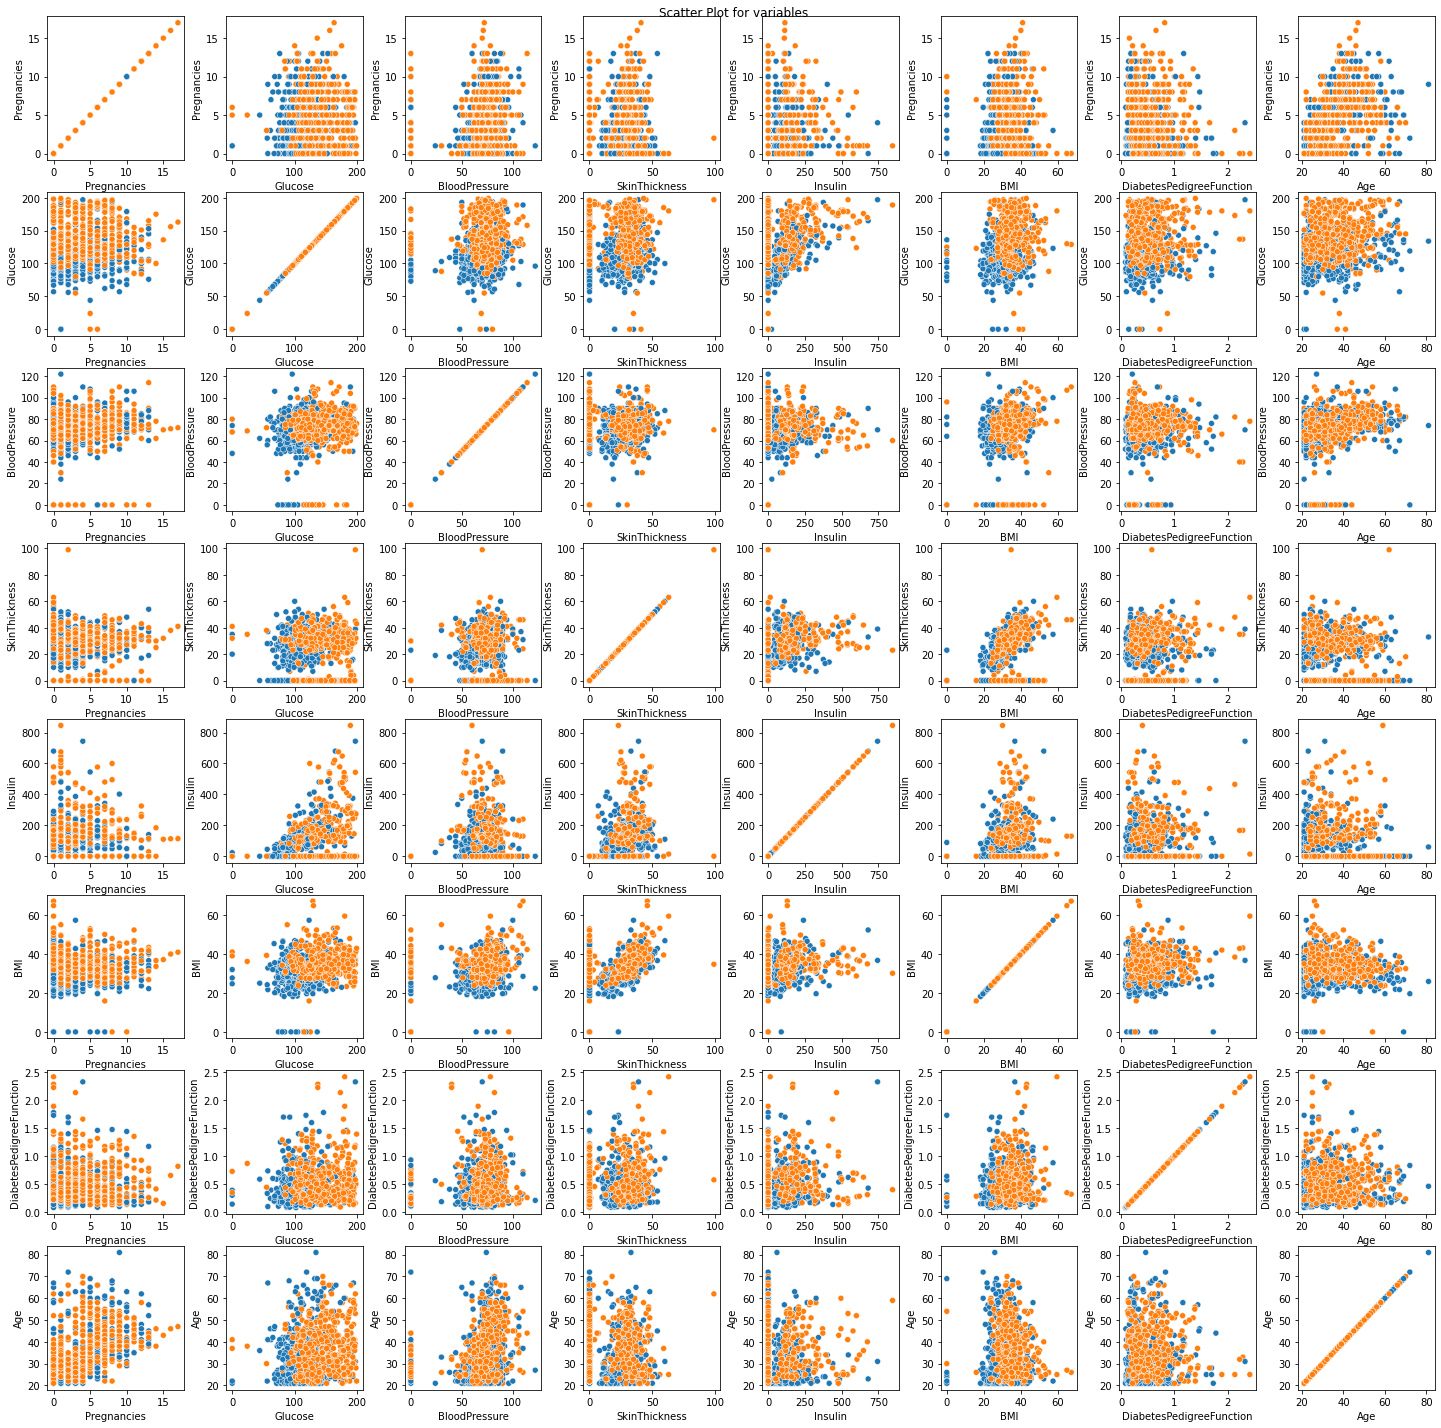

In [39]:

fig, axes = plt.subplots(8, 8, figsize=(20, 20))
fig.suptitle('Scatter Plot for variables')
plt.tight_layout()
for i, col_y in enumerate(data_x_resampled.columns):
    for j, col_x in enumerate(data_x_resampled.columns):             
        sns.scatterplot(ax=axes[i, j], x=col_x, y=col_y, data=new_data, hue="Outcome", legend = False)
 


        

In [ ]:
#6.Perform correlation analysis. Visually explore it using a heat map.

In [42]:
data_x_resampled.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.116059,0.167804,-0.094219,-0.110374,-0.008694,-0.043282,0.541527
Glucose,0.116059,1.000000,0.140950,0.039578,0.319677,0.226053,0.138668,0.259007
BloodPressure,0.167804,0.140950,1.000000,0.200241,0.063670,0.252104,0.034178,0.274459
SkinThickness,-0.094219,0.039578,0.200241,1.000000,0.457984,0.363331,0.205311,-0.124218
Insulin,-0.110374,0.319677,0.063670,0.457984,1.000000,0.189864,0.160804,-0.054289
BMI,-0.008694,0.226053,0.252104,0.363331,0.189864,1.000000,0.143771,0.022228
DiabetesPedigreeFunction,-0.043282,0.138668,0.034178,0.205311,0.160804,0.143771,1.000000,0.020861
Age,0.541527,0.259007,0.274459,-0.124218,-0.054289,0.022228,0.020861,1.000000


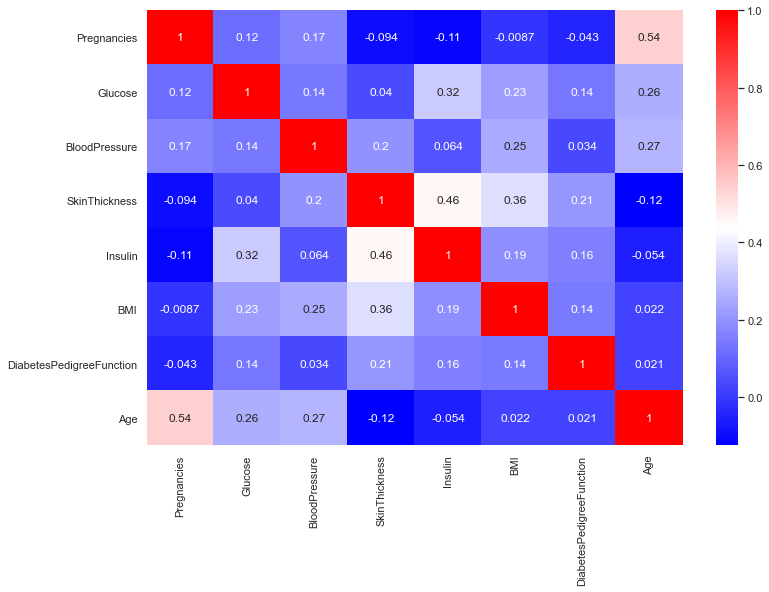

In [43]:
plt.figure(figsize=(12,8))
sns.heatmap(data_x_resampled.corr(), cmap='bwr', annot=True);

In [ ]:
#From the heat map it is clear that strong correlation exist between:
#Pregnancy_Age


In [ ]:
#Week 2

#1.Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. 



Its a classification problem so we will be building classification models for our training data and then compare performance of each model on test data to accurately predict target variable (Outcome):

1) Logistic Regression
2) Decision Tree
3) RandomForest Classifier 
4) Support Vector Machine (SVM)
5) Naive Bayes
6) Ensemble Learning -> Boosting -> Adaptive Boosting
7) Ensemble Learning -> Boosting -> Gradient Boosting (XGBClassifier)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, average_precision_score,confusion_matrix, classification_report

In [46]:
x_train,x_test,y_train,y_test=train_test_split(data_x_resampled,data_y_resampled,test_size=.2,random_state=10)

In [47]:
x_train.shape

(800, 8)

In [49]:
x_test.shape

(200, 8)

In [ ]:
#2.Apply an appropriate classification algorithm to build a model

In [ ]:
#a,Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(max_iter=300)

In [52]:
lr1.fit(x_train,y_train)

LogisticRegression(max_iter=300)

In [57]:
ypredtrain=lr1.predict(x_train)

In [58]:
from sklearn.metrics import accuracy_score
print("Training accuracy")
print("------------")
print(accuracy_score(y_train,ypredtrain))

Training accuracy
------------
0.76


In [59]:
ypredtest=lr1.predict(x_test)

In [60]:
print("Testing accuracy")
print("------------")
print(accuracy_score(y_test,ypredtest))

Testing accuracy
------------
0.74


2.Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
ypredtrain=dt.predict(x_train)


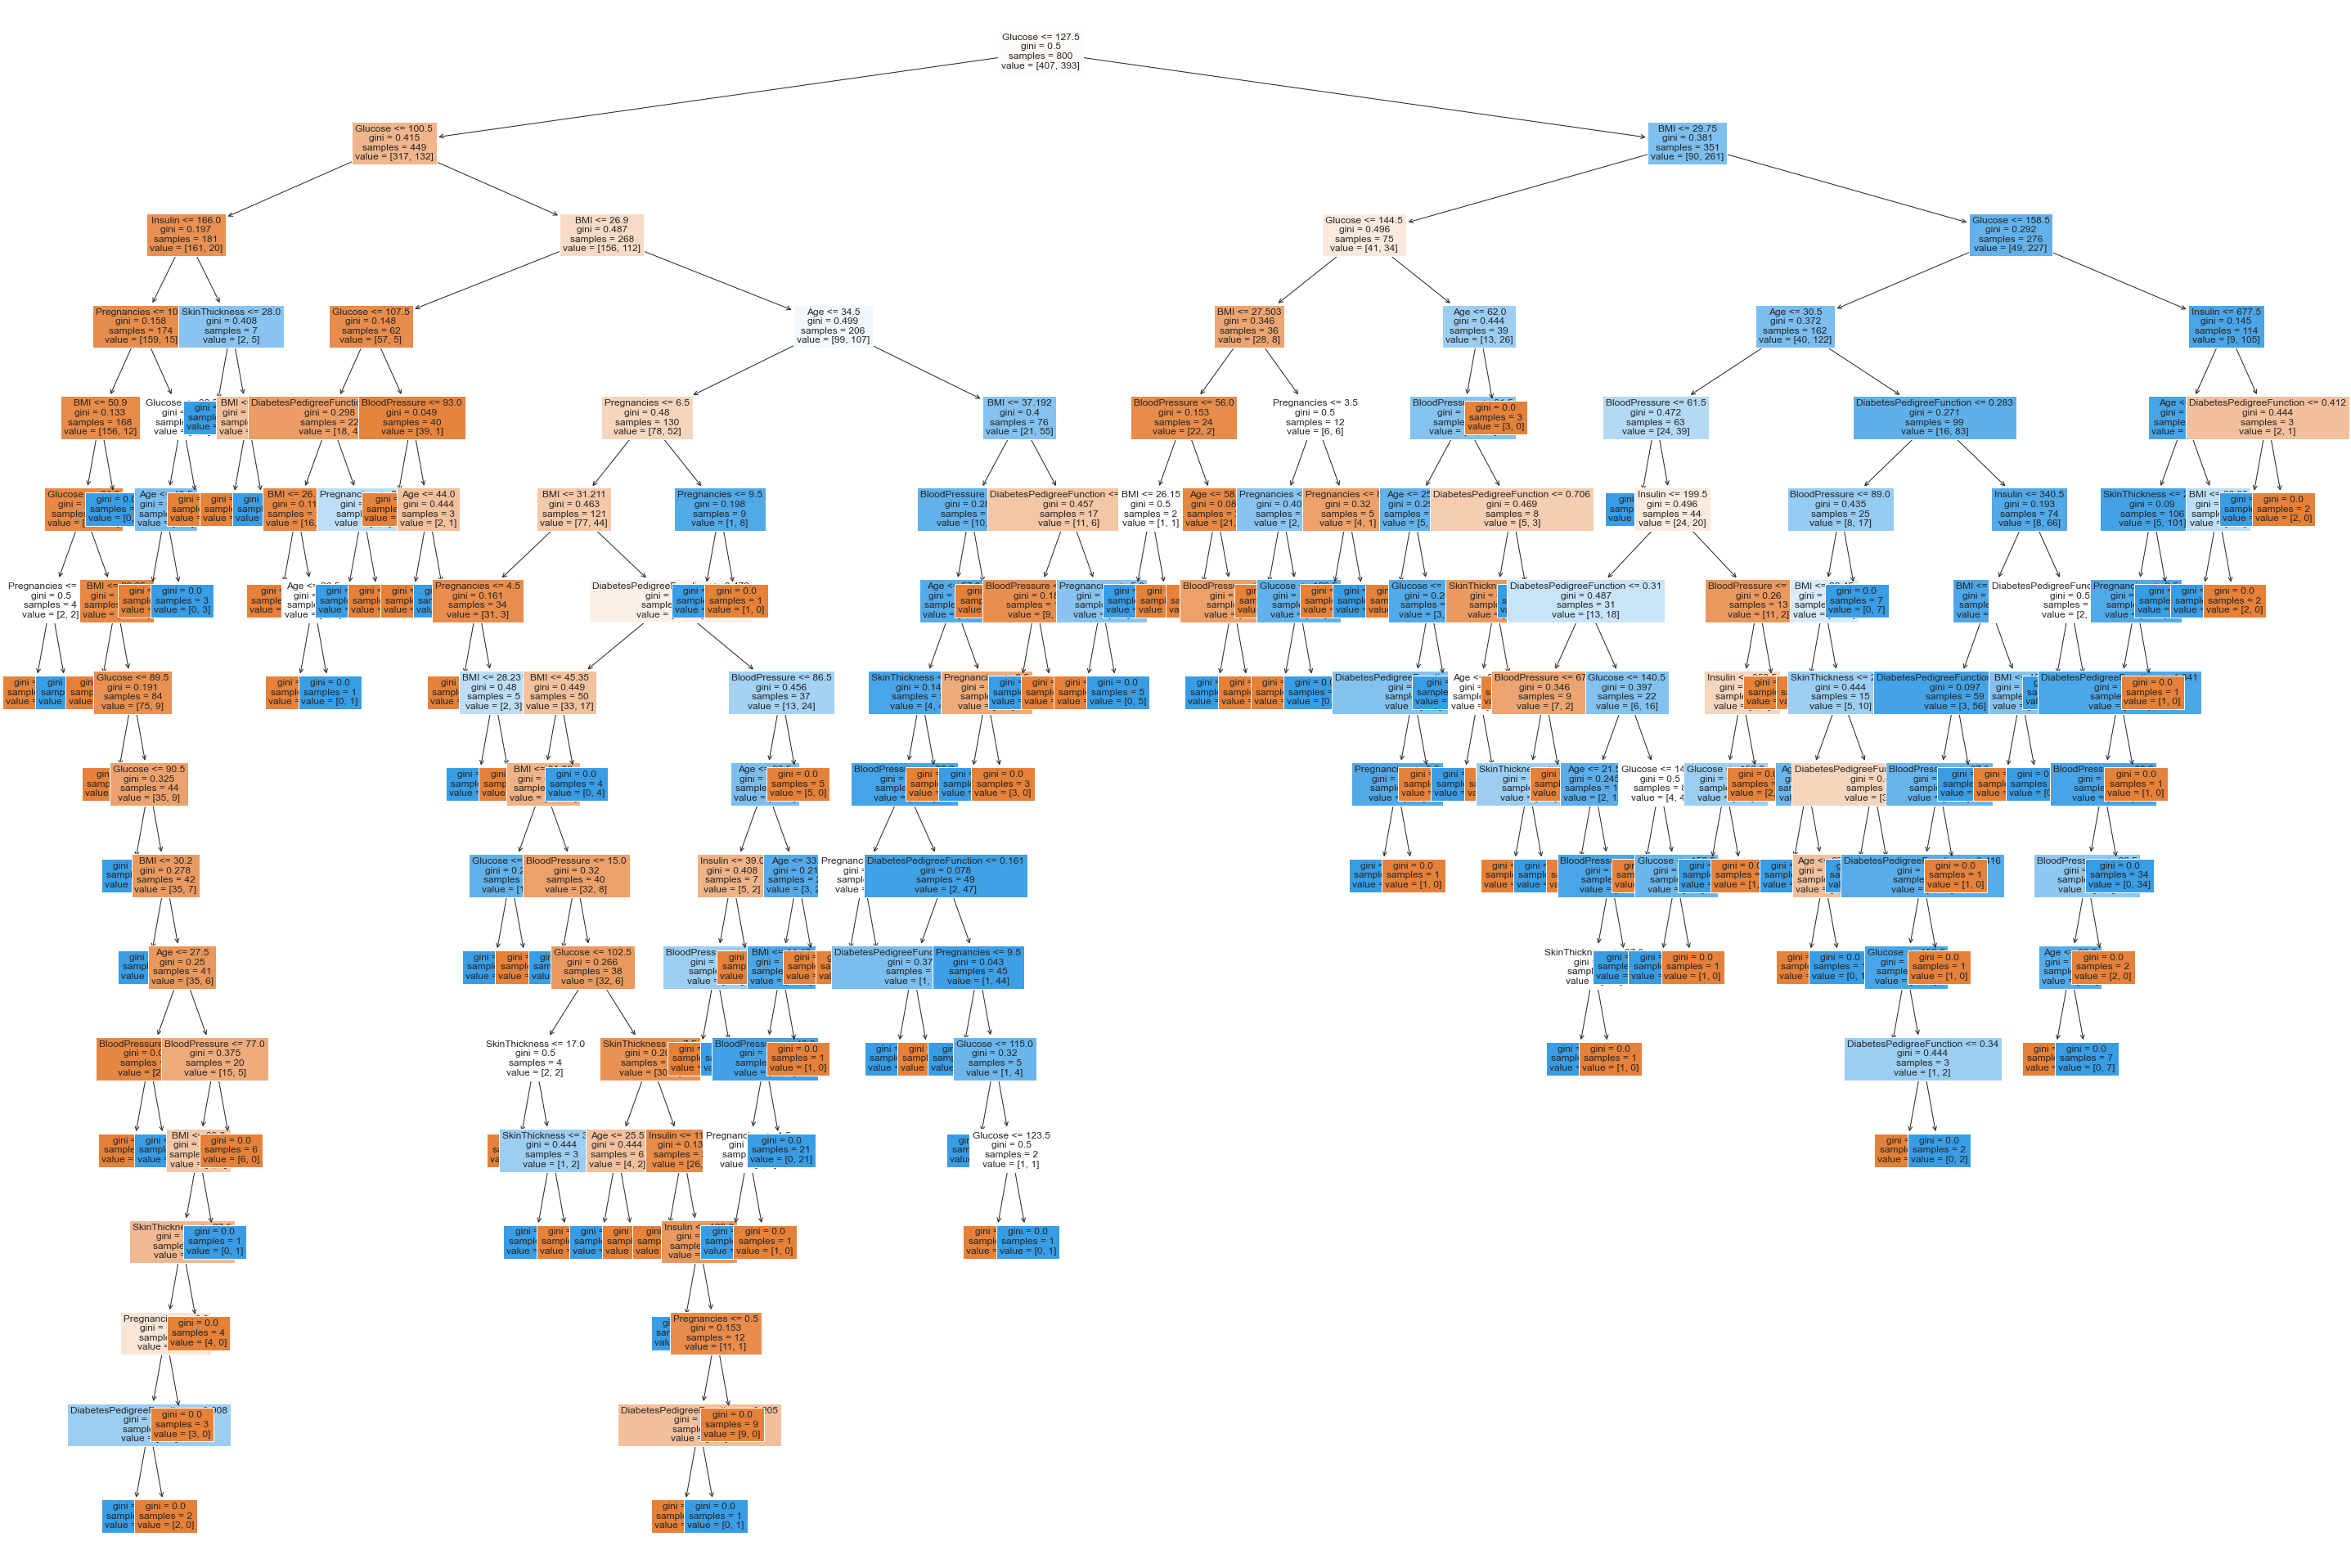

In [63]:
from sklearn import tree
plt.figure(figsize=(50,35))
tree.plot_tree(dt,feature_names=new_data.columns,filled=True,fontsize=12)
plt.show()

In [64]:
ypred_test=dt.predict(x_test)

In [65]:
print("The test data accuracy of the DT model is ",accuracy_score(y_test , ypredtest))

The test data accuracy of the DT model is  0.74


In [66]:
print(classification_report(y_test,ypredtest))

              precision    recall  f1-score   support

           0       0.71      0.74      0.73        93
           1       0.77      0.74      0.75       107

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200



In [68]:
ypred_train=dt.predict(x_train)

In [69]:
print("The test data accuracy of the DT model is ",accuracy_score(y_train , ypredtrain))

The test data accuracy of the DT model is  1.0


3. RandomForest Classiffier

In [75]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
ypredtrain=rf.predict(x_train)

In [76]:
print("Training Accuracy",accuracy_score(y_train,ypredtrain))

Training Accuracy 1.0


In [77]:
ypredtest=rf.predict(x_test)
print("Test Accuracy",accuracy_score(y_test,ypredtest))

Test Accuracy 0.81


Support Vector Machine

In [78]:
from sklearn.svm import SVC

svc_model = SVC()

svc_model.fit(x_train, y_train)

y_test_pred = svc_model.predict(x_test)

y_train_pred = svc_model.predict(x_train)

In [79]:
from sklearn.metrics import accuracy_score
print("The test data accuracy of the SVC model is ",accuracy_score(y_test , y_test_pred))

The test data accuracy of the SVC model is  0.745


In [80]:
from sklearn.metrics import accuracy_score
print("The train data accuracy of the SVC model is ",accuracy_score(y_train , y_train_pred))

The train data accuracy of the SVC model is  0.73625


In [ ]:
Naive Bayes Algorithm:

In [81]:
from sklearn.naive_bayes import GaussianNB

In [82]:
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)

GaussianNB()

In [84]:
y_train_pred = gnb_model.predict(x_train)

In [85]:
from sklearn.metrics import accuracy_score
print("The train data accuracy of the GaussianNB model is ",accuracy_score(y_train,y_train_pred))

The train data accuracy of the GaussianNB model is  0.75625


In [86]:
y_test_pred = gnb_model.predict(x_test)

In [87]:
from sklearn.metrics import accuracy_score
print("The train data accuracy of the GaussianNB model is ",accuracy_score(y_test,y_test_pred))

The train data accuracy of the GaussianNB model is  0.72


Ensembling

Ada Boosting

In [96]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
ada=AdaBoostClassifier(n_estimators=120) 
ada.fit(x_train,y_train)
ypredada=ada.predict(x_test)
print("The test accuracy score of Ada boost",accuracy_score(y_test,ypredada))

The test accuracy score of Ada boost 0.77


In [97]:
ypredada_train=ada.predict(x_train)
print("The train accuracy score of Ada boost",accuracy_score(y_train,ypredada_train))

The train accuracy score of Ada boost 0.85


XGBoost

In [89]:
from  xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(x_train,y_train)
ypredxg=xg.predict(x_test)
print("The test accuracy score of XG boost",accuracy_score(y_test,ypredxg))

[21:37:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The test accuracy score of XG boost 0.815


C:\Users\97455\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [90]:
print("The test accuracy score of XG boost",accuracy_score(y_test,ypredxg))

The test accuracy score of XG boost 0.815


In [95]:
ypredxg_train=xg.predict(x_train)
print("The test accuracy score of XG boost",accuracy_score(y_train,ypredxg_train))

The test accuracy score of XG boost 1.0


Among all models, RandomForest has given best accuracy. Therefore we will build final model using RandomForest.

3.Compare various models with the results from KNN algorithm.

In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [100]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [102]:
knn.score(x_train,y_train)

0.86875

In [103]:
knn.score(x_test,y_test)

0.755

As we compare KNN to all other models, KNN have the best accuracy score